# demo 数据预处理的方法

In [3]:
import numpy as np
import sklearn.preprocessing as sp

# 1. 均值移除

In [4]:
raw_samples = np.array([
    [23, 2, 10000],
    [21, 1, 9000],
    [40, 18, 10500]])
r = sp.scale(raw_samples)
r

array([[-0.58654642, -0.64194074,  0.26726124],
       [-0.82116498, -0.77032889, -1.33630621],
       [ 1.4077114 ,  1.41226963,  1.06904497]])

In [5]:
print(r.mean(axis=0))
print(r.std(axis=0))

[ 0.00000000e+00  7.40148683e-17 -9.62193288e-16]
[1. 1. 1.]


# 2. 范围缩放

In [6]:
m = sp.MinMaxScaler(feature_range=(0,1))
result = m.fit_transform(raw_samples)
result

array([[0.10526316, 0.05882353, 0.66666667],
       [0.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        ]])

In [7]:
#手动实现范围缩放
#针对原始样本中的每一列，都训练一个线性模型，就可以针对每个元素做缩放
newdata = []
for i in range(3):
    col_val = raw_samples[:, i]
    #整理A，B，求得x (A, B分别是求y = kx +b 中 k,b 的系数矩阵)
    A = np.array([[col_val.max(),1],
                 [col_val.min(),1]])
    B = np.array([1,0])
    x = np.linalg.lstsq(A, B)[0]
    #x[0]是k, x[1]是b
    new_colval = x[0] * col_val + x[1]
    newdata.append(new_colval)
np.array(newdata).T    
        

<ipython-input-7-c76b07feb84c>:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, B)[0]


array([[ 1.05263158e-01,  5.88235294e-02,  6.66666667e-01],
       [ 0.00000000e+00, -2.08166817e-17,  1.77635684e-15],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

# 3. 归一化

In [8]:
data = np.array([
    [17., 100., 4000],
    [20., 80., 5000],
    [23., 75., 5500]])
data

array([[  17.,  100., 4000.],
       [  20.,   80., 5000.],
       [  23.,   75., 5500.]])

In [9]:
result = sp.normalize(data, norm = 'l1')#l1范数
print(result)
print(np.abs(result).sum(axis = 1))

[[0.00412922 0.02428953 0.97158125]
 [0.00392157 0.01568627 0.98039216]
 [0.00410861 0.01339764 0.98249375]]
[1. 1. 1.]


In [10]:
result = sp.normalize(data, norm = 'l2')#l2范数
print(result)
print((result**2).sum(axis = 1))

[[0.00424863 0.02499197 0.99967862]
 [0.00399946 0.01599782 0.99986403]
 [0.00418139 0.01363498 0.9998983 ]]
[1. 1. 1.]


# 4. 二值化

In [11]:
# 给出阈值, 获取二值化器
bin = sp.Binarizer(threshold = 100)
# 调用transform方法对原始样本矩阵进行二值化预处理操作
r = bin.transform(data)
r

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [12]:
#图像二值化 pip3 install opencv-python -i https://pypi.tuna.tsinghua.edu.cn/simple/
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('lily.jpg')
print(img.shape) #可以看这张图片多大
img[0][0]

(512, 512, 3)


array([ 5, 55, 13], dtype=uint8)

(512, 512)


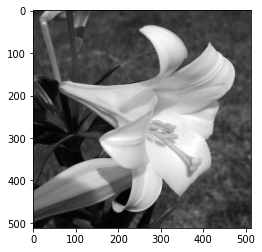

In [17]:
img = cv.imread('lily.jpg', 0)#0代表变黑白,-1代表原来的图片
print(img.shape)
plt.imshow(img, cmap='gray')

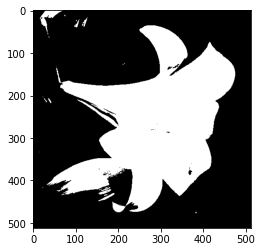

In [19]:
#对这个图片进行二值化处理
bin = sp.Binarizer(threshold = 127)
r = bin.transform(img)
plt.imshow(r, cmap='gray')#cmap='gray'意思是显示灰度图像